---
---
# Project: Text dataset

Dataset: sentiment analysis dataset (on canvas:
(https://ncl.instructure.com/courses/53509/files/7666186?wrap=1),
(https://ncl.instructure.com/courses/53509/files/7666193?wrap=1),
(https://ncl.instructure.com/courses/53509/files/7666197?wrap=1)).

Each sample in the dataset represents a tweet. Each tweet has a sentiment label (Positive, Negative, Neutral).

**Task Description:** Apply **a combination of** different approaches including pre-processing techniques, shallow and deep classifiers, ensembled approaches, machine learning approaches beyond supervised learning if applicable, data augmentation if applicable to predict the sentiment of the test set. Try your best to improve the prediction results.

Primary **Evaluation metrics: F-1 measure**. Though you should also use others.

## Your answer *below*

## **Introduction**

In the ever-evolving field of Natural Language Processing (NLP), sentiment analysis stands out as a crucial task, especially in the age of social media where understanding public sentiment can provide invaluable insights. This project focuses on applying a diverse types of machine learning techniques and classifiers to predict sentiment from Twitter text data. The goal is to explore various methods including pre-processing techniques, data augmentation, both shallow and deep classifiers, and ensemble approaches, to improve and reach the best prediction accuracy.

To visualize the systematic approach adopted throughout this project, a detailed flowchart has been mapped. This flowchart delineates the sequential steps taken, from the initial data acquisition and preprocessing stages to the intricate model selection and training processes, followed by hyperparameter tuning and cross-validation. It culminates in the performance visualization, where the predictive accuracy of the models is assessed using a range of metrics. The flowchart not only serves as a guide to the project’s structured workflow but also as a strategic tool that highlights the critical checkpoints and decision nodes that underpin the robustness of the predictive models developed.

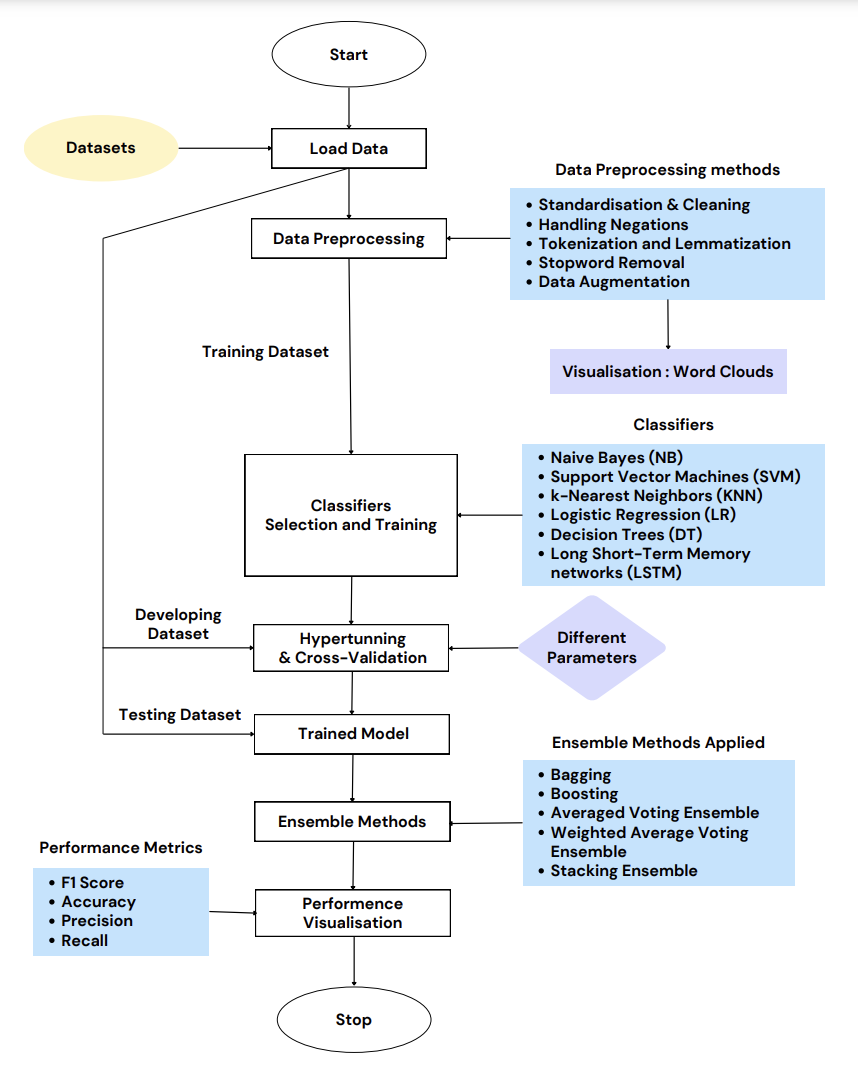

In [ ]:
# Load the data
import pandas as pd
import numpy as np
import random

# Set the seed for reproducibility
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)

train_df = pd.read_csv('/content/drive/MyDrive/Twitter/Tweets_train.csv' , encoding='latin-1')
dev_df = pd.read_csv('/content/drive/MyDrive/Twitter/Tweets_dev.csv' , encoding='latin-1')
test_df = pd.read_csv('/content/drive/MyDrive/Twitter/Tweets_test.csv' , encoding='latin-1')

train_df.head(), dev_df.head(), test_df.head()


(             tweet_id                                               text  \
 0  569179849518161920                    @united you're good. Thank you!   
 1  569835751275433984  @AmericanAir way to ruin a vacation, my brothe...   
 2  568588936852799488  @JetBlue yes thankfully! Catering just got her...   
 3  569525116725567491  @USAirways The automated message isn't helpful...   
 4  568807823187976193  @JetBlue I'm #MakingLoveOutofNothingAtAll on m...   
 
   airline_sentiment  
 0          positive  
 1          negative  
 2          positive  
 3          negative  
 4          positive  ,
              tweet_id                                               text  \
 0  568107472260624384  @southwestair Great job celebrating #MardiGras...   
 1  568215698524246016  @southwestair thanks for taking it up a notch!...   
 2  567842466851905536  @USAirways Being put back on hold for what has...   
 3  568834824410148864  @united Thank you for your offer! All sorted o...   
 4  56959052

The dataset for this project comprises tweets related to airline services, categorized into three sentiments: negative, neutral, and positive. One of the initial challenges is the imbalance in the dataset, with a predominant amount of negative sentiments shown. Such imbalance can bias the models towards the majority class, leading to poor generalization on minority classes. Another challenge is the inherent noise and unstructured nature of Twitter data, which includes slang, typos and colloquial expressions.

## **Data Preprocessing**
**Cleaning Text Data**

The preprocessing phase began with the standardization and cleaning of text data. This involved converting all text to lowercase to maintain consistency and remove any case-sensitive biases. Punctuation, URLs, special characters, and numbers were removed, and replaced with spaces. This step was essential as it eliminated irrelevant and distracting elements that could potentially skew the model's learning.

**Handling Negations**

A unique aspect of sentiment analysis is the interpretation of negations, a common occurrence in natural language. Words such as "not," "never," "no," and contractions ending with "n't" significantly alter the sentiment of a phrase. To address this, I implemented the technique to combine negations with subsequent words, forming composite terms. This approach ensured that models interpreted the sentiment of such phrases correctly. For instance, "not good" would become "not_good," thus maintaining the intended negative sentiment.

**Tokenization and Lemmatization**

Tokenization, the process of breaking down text into individual words, was a vital step for feature extraction. Following this, I employed lemmatization, which, unlike stemming, takes into account the context of words and converts them into their meaningful base forms. Lemmatization was crucial for reducing the complexity of the text data, helping to improve the performance of the models. It aids in grouping together various forms of a word so they can be analysed as a single item, which is particularly useful in sentiment analysis to capture the essence of the sentiment regardless of the word's tense or variation (Symeonidis, Effrosynidis & Arampatzis, 2018).

**Stopword Removal**

Common words, often referred to as "stopwords", were excluded from the text data. These are words that generally do not offer unique or significant information. This step is imperative for sentiment analysis as it allows models to focus on words that significantly impact sentiment. The removal of stopwords helps in reducing the dimensionality of the feature space, leading to more efficient training of models.

**Data Augmentation: Tackling Class Imbalance**

Given the class imbalance, data augmentation was employed for the 'neutral' and 'positive' classes. This involved synonym replacement, a technique that generates more diverse examples without altering the original sentiment. The augmented dataset aimed to provide a more balanced representation of each class, potentially improving the model's ability to generalize (Haddi, Liu & Shi, 2013).

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


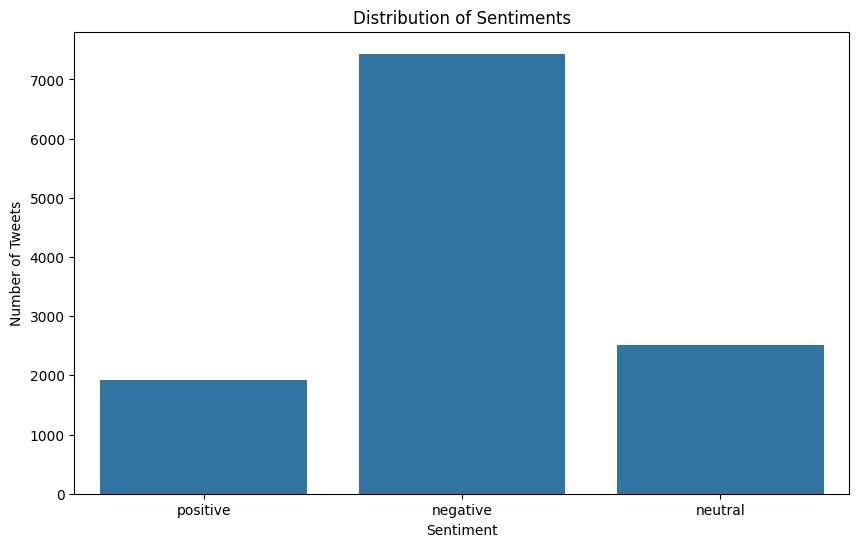

In [ ]:
# Preprocess the Data
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import seaborn as sns
import random
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

## Fcuntion for removing handles
def handle_negations(text):
    text = re.sub(r"\b(not|no|never|n't)\b[\s]+([a-z]+)", r"\1_\2", text)
    return text

## Preprocess Function
def preprocess_text(text):
    # Remove handles (@user)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove URLs
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Handle negations
    text = handle_negations(text)
    # Tokenize and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]

    return ' '.join(words)

## Preprocess the data
train_df['text'] = train_df['text'].apply(preprocess_text)
dev_df['text'] = dev_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

## Plot the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='airline_sentiment', data=train_df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
# Augmente the data
## Function for Data Augmentation
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)

def synonym_replacement(text, n):
    words = text.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word.isalpha()]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    sentence = ' '.join(new_words)
    return sentence

def augment_data(df, class_name, n_augmentations):
    class_df = df[df['airline_sentiment'] == class_name]
    augmented_texts = []
    for text in class_df['text']:
        for _ in range(n_augmentations):
            augmented_text = synonym_replacement(text, n=2)  # Replace 2 words with synonyms
            augmented_texts.append(augmented_text)
    augmented_df = pd.DataFrame({'text': augmented_texts, 'airline_sentiment': class_name})

## Select 'positive' and 'neutral' data to augmente
augmented_neutral = augment_data(train_df, 'neutral', 2)
augmented_positive = augment_data(train_df, 'positive', 2)
augmented_train_df = pd.concat([train_df, augmented_neutral, augmented_positive], ignore_index=True)

## **Data Preprocessing and Exploration**

**Word Clouds for Sentiment Visualization**

Visual analytics play a pivotal role in understanding textual data. Word clouds, for instance, provide a visual representation of text data, highlighting the most frequent words within a dataset. They are particularly useful in sentiment analysis as they can quickly reveal the words most associated with positive, negative, and neutral sentiments, offering direct insights into the prevalent themes within each category.

For this dataset, the following word clouds were generated for each sentiment category using the WordCloud library in Python. The positive tweets word cloud was dominated by words like 'thank', 'great', and 'love', indicating customer satisfaction and positive experiences. Conversely, the negative tweets word cloud featured words such as 'cancelled', 'delayed', and 'baggage', reflecting common issues faced by customers. Neutral tweets contained words like 'flight', 'ticket', and 'booking', suggesting a factual or informational tone.

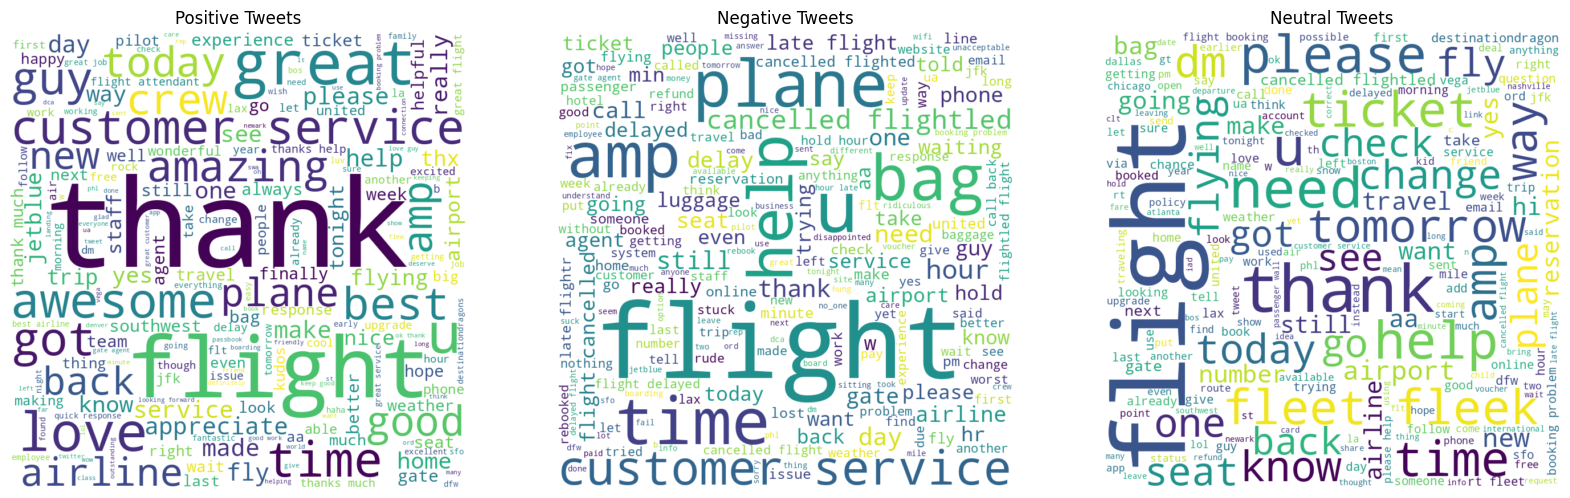

In [ ]:
# Visilise the Data with Word Cloud
from wordcloud import WordCloud

## Function for generating a word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text)
    return wordcloud

positive_text = ' '.join(augmented_train_df[augmented_train_df['airline_sentiment'] == 'positive']['text'])
negative_text = ' '.join(augmented_train_df[augmented_train_df['airline_sentiment'] == 'negative']['text'])
neutral_text = ' '.join(augmented_train_df[augmented_train_df['airline_sentiment'] == 'neutral']['text'])

positive_wordcloud = generate_word_cloud(positive_text)
negative_wordcloud = generate_word_cloud(negative_text)
neutral_wordcloud = generate_word_cloud(neutral_text)

## Plot the word clouds of the augmented data
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.title('Positive Tweets')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.title('Negative Tweets')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.title('Neutral Tweets')
plt.axis("off")

plt.show()

**TF-IDF Vectorization: Converting Text to Features**

After visual analysis, the focus shifts towards transforming the textual data into a numerical format suitable for machine learning models. Term Frequency-Inverse Document Frequency (TF-IDF) Vectorization is employed to achieve this transformation. TF-IDF is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents, which is often refered as corpus. It increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

The TfidfVectorizer from Scikit-learn is configured to a maximum of 5000 features to vectorize the preprocessed text data, which is for the need to balance between maintaining a rich feature set and managing computational complexity. The high-dimensional output is the result of transforming the tweets into a matrix of TF-IDF features, which serves as input for the various machine learning models. This vectorization process is critical in identifying discriminative terms that could facilitate effective sentiment classification (Krouska, Troussas & Virvou, 2016).

In [ ]:
# Transform the Data Using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Feature Engineering: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(augmented_train_df['text'])
X_dev_tfidf = tfidf_vectorizer.transform(dev_df['text'])
X_test_tfidf =  tfidf_vectorizer.transform(test_df['text'])

# Labels
y_train = augmented_train_df['airline_sentiment']
y_dev = dev_df['airline_sentiment']
y_test = test_df['airline_sentiment']

## **Modeling and Evaluation Strategy**

**Models Selection**

The table below shows the diverse selection of machine learning models applied in this task, encompassing both traditional algorithms and a deep learning approach. Each model is chosen based on its proven track record in handling text classification tasks and its unique way of learning from data.

**Naive Bayes (NB)** is a probabilistic learning algorithm well-suited for high-dimensional data, is the first model implemented. Its underlying assumption of feature independence makes it particularly efficient for text classification despite this assumption often being violated in practice (Desai & Mehta, 2016).

**Support Vector Machines (SVM)** is a robust supervised learning model, is utilized for its effectiveness in handling non-linear data and its ability to find the optimal boundary between different classes.

**k-Nearest Neighbors (KNN)** is an instance-based learning algorithm, classifies new instances based on the majority vote of its nearest neighbors, offering a simple yet powerful classification mechanism.

**Logistic Regression (LR)** is traditionally used for regression, but it is also a powerful tool for multiclass problems like sentiment analysis. Its ability to provide probabilities alongside predictions adds an extra layer of interpretability.

**Decision Trees (DT)** offers a tree-based model for classification, providing a series of rule-based decisions that are easy to interpret and understand. Their extension to ensemble methods like bagging and boosting can significantly enhance performance by addressing overfitting and increasing model robustness.

**Long Short-Term Memory networks (LSTM)** is a type of recurrent neural network, is chosen for its proficiency in capturing long-term dependencies in sequence data, which is crucial in understanding the context within the text.

In [ ]:
# All the applying classifiers
classifiers_df = pd.DataFrame({
    'Classifier': ['Naive Bayes (NB)', 'Support Vector Machines (SVM)', 'k-Nearest Neighbor (KNN)', 'Logistic Regression (LR)', 'Decision Tree (DT)', 'Long Short-Term Memory (LSTM)'],
    'Approach': ['Probabilistic learning algorithm','Supervised learning model','Instance-based learning algorithm','Regression model','Tree-based model for classification and regression','Recurrent neural network for sequence data']})

## Create a table to summarise
classifiers_df.index = range(1, len(classifiers_df) + 1)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(classifiers_df.style
            .set_properties(**{'border': '1px black solid !important','text-align': 'center'})
            .set_table_styles([{'selector': 'th','props': [('border', '1px black solid !important'),('text-align', 'center')]}]))


,Classifier,Approach
1,Naive Bayes (NB),Probabilistic learning algorithm
2,Support Vector Machines (SVM),Supervised learning model
3,k-Nearest Neighbor (KNN),Instance-based learning algorithm
4,Logistic Regression (LR),Regression model
5,Decision Tree (DT),Tree-based model for classification and regression
6,Long Short-Term Memory (LSTM),Recurrent neural network for sequence data


## **Model Development and Validation Strategy**

The development and validation strategy for each model followed a comprehensive and consistent process. Initially, each model was trained on the augmented training dataset with the model default parameters, then evaluated on the test set to establish a baseline performance. This initial step was crucial to determine the efficacy of the models in their default configurations.

Subsequently, hyperparameter tuning was conducted on a separate development set using grid search with cross-validation. This step aimed to identify the optimal set of parameters for each model to improve performance. The comparison between the baseline and the tuned models was based on the macro average F1-score, a harmonic mean of precision and recall, to ensure a balanced evaluation, especially relevant in datasets with class imbalances.

To test the efficacy of the tuning, models were re-evaluated on the test dataset to compare pre- and post-tuning results. Not all models demonstrated improved performance post-tuning, a result that could be attributed to various factors including overfitting to the development set or the complexity of the model versus the simplicity of the data patterns. This underscores the nuanced nature of model tuning, where enhancements in one area may inadvertently lead to compromises in another.

In order to numerically and visually inspect each model's predictive capabilities, I utilized the Test Report, which demonstrates a detailed breakdown of precision, recall, and F1-score for each class, as well as the Confusion Matrix, that visualise the correct and incorrect predictions. These tools offered granular insights into the models' performance, revealing not only their overall accuracy but also their class-specific strengths and weaknesses. For instance, a model with a high precision but low recall indicates a cautious prediction strategy that, while often correct, is also prone to missing several true positive cases.


**Ensemble Methods applied on individual models**

Each Model's better perfomed version, either the orginal or the tuned, were then subjected to bagging, an ensemble technique that trains multiple instances of a model on different subsets of the data and aggregates their predictions. The decision to bag a model was informed by its standalone performance and the nature of the algorithm—models that exhibited high variance were prime candidates for bagging as it could help reduce overfitting and enhance generalization (Troussas, Krouska & Virvou, 2016).

Additionally, the Decision Tree model was also evaluated using the boosting technique. Boosting works by sequentially applying a weak base learner to repeatedly modified versions of the data, increasing the weight of misclassified data points. The model thus focuses on the more difficult cases in the training set, aiming to incrementally improve the predictive accuracy with each iteration. This approach is particularly effective with decision trees, turning a weak base learner into a strong ensemble model. However, careful tuning is necessary to avoid overemphasis on outliers and to prevent overfitting.

In [ ]:
# Function for Evaluating the models
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Naive Bayes Test Report (Original Model):
               precision    recall  f1-score   support

    negative       0.72      0.99      0.83       918
     neutral       0.82      0.30      0.44       310
    positive       0.86      0.36      0.51       236

    accuracy                           0.74      1464
   macro avg       0.80      0.55      0.59      1464
weighted avg       0.76      0.74      0.70      1464



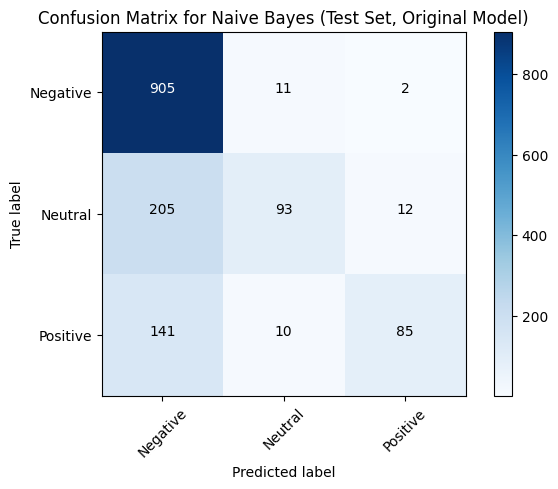

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

## Train the model with the processed training data
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

## Evaluate on testing dataset
y_pred_test_nb = nb_model.predict(X_test_tfidf)
test_report_nb = classification_report(y_test, y_pred_test_nb)
print("Naive Bayes Test Report (Original Model):\n", test_report_nb)

## Confusion Matrix
cm_test_nb = confusion_matrix(y_test, y_pred_test_nb)
plot_confusion_matrix(cm_test_nb, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Naive Bayes (Test Set, Original Model)')


In [ ]:
# Naive Bayes Model Hyperparameter Tuning with Dev Dataset
nb_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

## Grid search with cross-validation
nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='f1_macro')
nb_grid.fit(X_dev_tfidf, y_dev)

## Best parameters
print("Best parameters for Naive Bayes: ", nb_grid.best_params_)


Best parameters for Naive Bayes:  {'alpha': 0.01}


Naive Bayes Test Report (Tuned Model):
               precision    recall  f1-score   support

    negative       0.78      0.95      0.86       918
     neutral       0.69      0.44      0.53       310
    positive       0.78      0.50      0.61       236

    accuracy                           0.77      1464
   macro avg       0.75      0.63      0.67      1464
weighted avg       0.76      0.77      0.75      1464



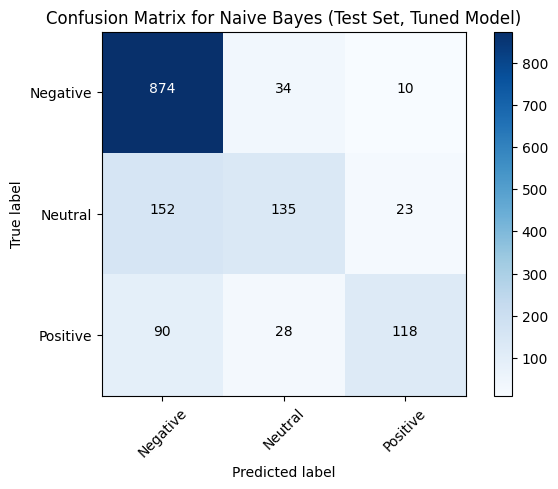

In [ ]:
# Tuned Naive Bayes Model
nb_best = MultinomialNB(alpha=0.01)
nb_best.fit(X_train_tfidf, y_train)

## Evaluate on test dataset
y_pred_test_nb_best = nb_best.predict(X_test_tfidf)
test_report_nb_best = classification_report(y_test, y_pred_test_nb_best)
print("Naive Bayes Test Report (Tuned Model):\n", test_report_nb_best)

cm_test_nb_best = confusion_matrix(y_test, y_pred_test_nb_best)
plot_confusion_matrix(cm_test_nb_best, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Naive Bayes (Test Set, Tuned Model)')


Bagged Naive Bayes Test Report:
               precision    recall  f1-score   support

    negative       0.77      0.96      0.86       918
     neutral       0.67      0.42      0.51       310
    positive       0.79      0.45      0.58       236

    accuracy                           0.76      1464
   macro avg       0.75      0.61      0.65      1464
weighted avg       0.75      0.76      0.74      1464



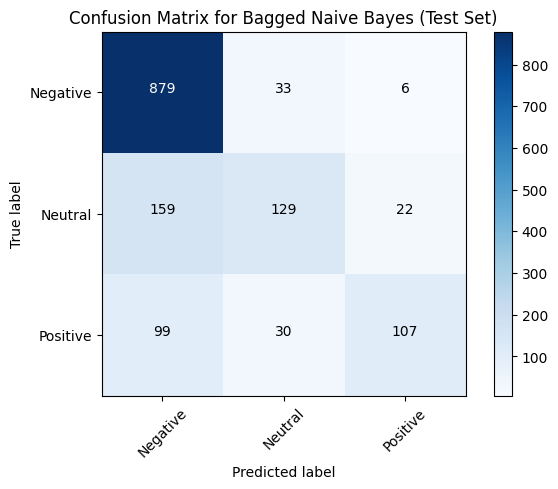

In [ ]:
# Naive Bayes Model - Bagging
from sklearn.ensemble import BaggingClassifier

# Create a Bagged version of the Naive Bayes model
bagged_nb = BaggingClassifier(estimator=MultinomialNB(alpha=0.01), n_estimators=10, random_state=0)
bagged_nb.fit(X_train_tfidf, y_train)

# Evaluate on the test dataset
y_pred_test_bagged_nb = bagged_nb.predict(X_test_tfidf)
test_report_bagged_nb = classification_report(y_test, y_pred_test_bagged_nb)
print("Bagged Naive Bayes Test Report:\n", test_report_bagged_nb)

cm_test_bagged_nb = confusion_matrix(y_test, y_pred_test_bagged_nb)
plot_confusion_matrix(cm_test_bagged_nb, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Bagged Naive Bayes (Test Set)')


Logistic Regression Test Report (Original Model):
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87       918
     neutral       0.69      0.50      0.58       310
    positive       0.81      0.61      0.70       236

    accuracy                           0.80      1464
   macro avg       0.77      0.69      0.72      1464
weighted avg       0.79      0.80      0.78      1464



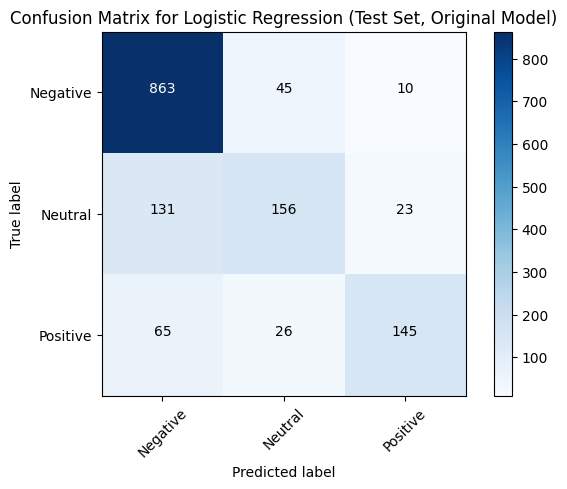

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

## Train the model with the processed training data
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_tfidf, y_train)

## Evaluate on testing dataset
y_pred_test_lr = lr_model.predict(X_test_tfidf)
test_report_lr = classification_report(y_test, y_pred_test_lr)
print("Logistic Regression Test Report (Original Model):\n", test_report_lr)

## Confusion Matrix
cm_test_lr = confusion_matrix(y_test, y_pred_test_lr)
plot_confusion_matrix(cm_test_lr, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Logistic Regression (Test Set, Original Model)')


In [ ]:
# Logistic Regression Hyperparameter Tuning
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 3000, 5000, 20000]}

## Grid search with cross-validation
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='f1_macro')
lr_grid.fit(X_dev_tfidf, y_dev)

## Best parameters
print("Best parameters for Logistic Regression: ", lr_grid.best_params_)


Best parameters for Logistic Regression:  {'C': 100, 'max_iter': 1000}


Logistic Regression Test Report (Tuned Model):
               precision    recall  f1-score   support

    negative       0.86      0.84      0.85       918
     neutral       0.52      0.58      0.54       310
    positive       0.66      0.61      0.63       236

    accuracy                           0.75      1464
   macro avg       0.68      0.68      0.68      1464
weighted avg       0.75      0.75      0.75      1464



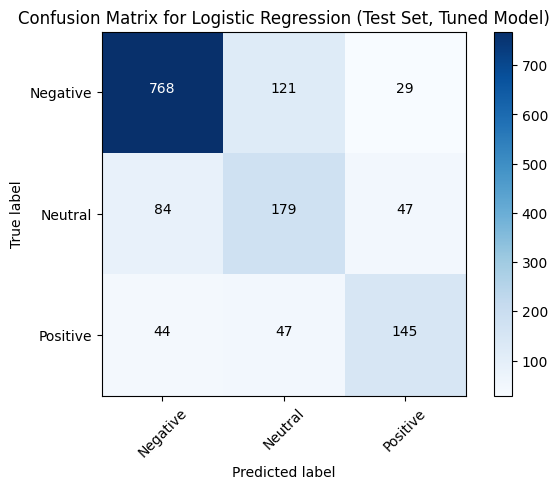

In [ ]:
# Tuned Logistic Regression Model
lr_best = LogisticRegression(C=100, max_iter=1000)
lr_best.fit(X_train_tfidf, y_train)

## Evaluate on test dataset
y_pred_test_lr_best = lr_best.predict(X_test_tfidf)
test_report_lr_best = classification_report(y_test, y_pred_test_lr_best)
print("Logistic Regression Test Report (Tuned Model):\n", test_report_lr_best)

cm_test_lr_best = confusion_matrix(y_test, y_pred_test_lr_best)
plot_confusion_matrix(cm_test_lr_best, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Logistic Regression (Test Set, Tuned Model)')


Bagged Logistic Regression Test Report:
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87       918
     neutral       0.69      0.49      0.57       310
    positive       0.80      0.59      0.68       236

    accuracy                           0.79      1464
   macro avg       0.77      0.67      0.71      1464
weighted avg       0.78      0.79      0.78      1464



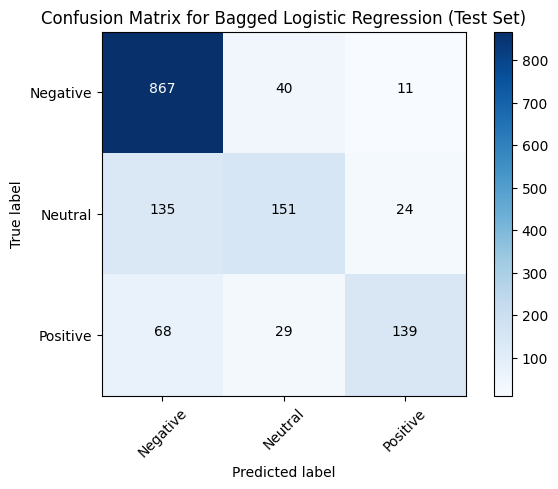

In [ ]:
# Logistic Regression -  Bagging
from sklearn.ensemble import BaggingClassifier

bagged_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=10000), n_estimators=10, random_state=0)
bagged_lr.fit(X_train_tfidf, y_train)

# Evaluate on test dataset
y_pred_test_bagged_lr = bagged_lr.predict(X_test_tfidf)
test_report_bagged_lr = classification_report(y_test, y_pred_test_bagged_lr)
print("Bagged Logistic Regression Test Report:\n", test_report_bagged_lr)

cm_test_bagged_lr = confusion_matrix(y_test, y_pred_test_bagged_lr)
plot_confusion_matrix(cm_test_bagged_lr, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Bagged Logistic Regression (Test Set)')


SVM Test Report (Original Model):
               precision    recall  f1-score   support

    negative       0.79      0.95      0.86       918
     neutral       0.71      0.42      0.53       310
    positive       0.79      0.61      0.69       236

    accuracy                           0.78      1464
   macro avg       0.77      0.66      0.69      1464
weighted avg       0.77      0.78      0.76      1464



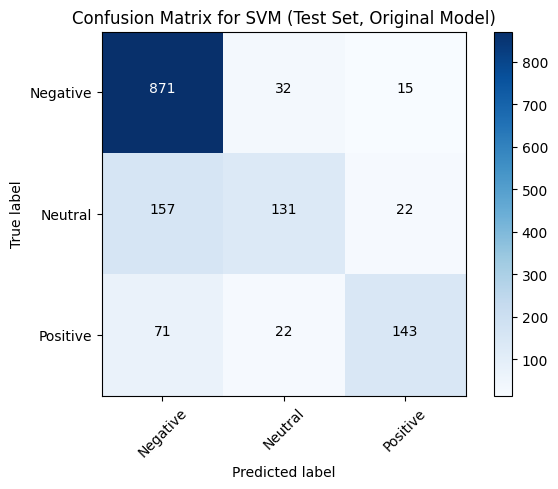

In [ ]:
# SVM Model
from sklearn.svm import SVC

## Train the model with the processed training data
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

## Evaluate on testing dataset
y_pred_test_svm = svm_model.predict(X_test_tfidf)
test_report_svm = classification_report(y_test, y_pred_test_svm)
print("SVM Test Report (Original Model):\n", test_report_svm)

## Confusion Matrix
cm_test_svm = confusion_matrix(y_test, y_pred_test_svm)
plot_confusion_matrix(cm_test_svm, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for SVM (Test Set, Original Model)')


In [ ]:
# SVM Hyperparameter Tuning
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

## Grid search with cross-validation
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1_macro')
svm_grid.fit(X_dev_tfidf, y_dev)

## Best parameters
print("Best parameters for SVM: ", svm_grid.best_params_)

Best parameters for SVM:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


SVM Test Report (Tuned Model):
               precision    recall  f1-score   support

    negative       0.84      0.85      0.84       918
     neutral       0.55      0.55      0.55       310
    positive       0.67      0.65      0.66       236

    accuracy                           0.75      1464
   macro avg       0.69      0.68      0.68      1464
weighted avg       0.75      0.75      0.75      1464



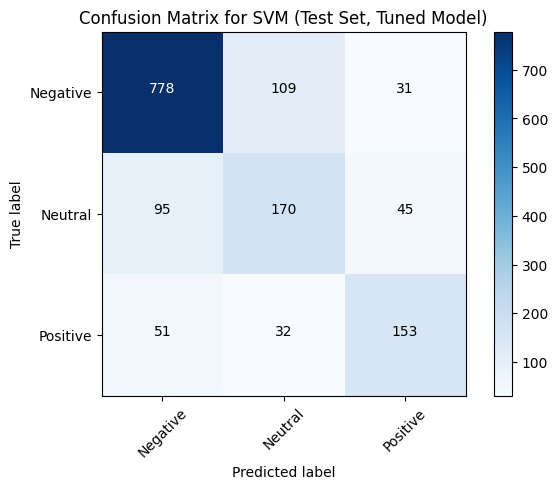

In [ ]:
# Tuned SVM Model
svm_best = SVC(C=10, gamma='scale', kernel='linear')
svm_best.fit(X_train_tfidf, y_train)

## Evaluate on test dataset
y_pred_test_svm_best = svm_best.predict(X_test_tfidf)
test_report_svm_best = classification_report(y_test, y_pred_test_svm_best)
print("SVM Test Report (Tuned Model):\n", test_report_svm_best)

cm_test_svm_best = confusion_matrix(y_test, y_pred_test_svm_best)
plot_confusion_matrix(cm_test_svm_best, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for SVM (Test Set, Tuned Model)')


Bagged SVM Test Report:
               precision    recall  f1-score   support

    negative       0.79      0.95      0.86       918
     neutral       0.73      0.43      0.54       310
    positive       0.79      0.58      0.67       236

    accuracy                           0.78      1464
   macro avg       0.77      0.65      0.69      1464
weighted avg       0.77      0.78      0.76      1464



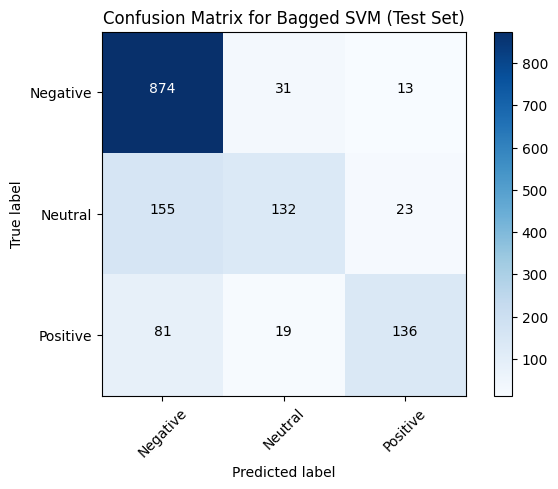

In [ ]:
# SVM - Bagging
bagged_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)
bagged_svm.fit(X_train_tfidf, y_train)

# Evaluate on test dataset
y_pred_test_bagged_svm = bagged_svm.predict(X_test_tfidf)
test_report_bagged_svm = classification_report(y_test, y_pred_test_bagged_svm)
print("Bagged SVM Test Report:\n", test_report_bagged_svm)

cm_test_bagged_svm = confusion_matrix(y_test, y_pred_test_bagged_svm)
plot_confusion_matrix(cm_test_bagged_svm, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Bagged SVM (Test Set)')


KNN Test Report (Original Model):
               precision    recall  f1-score   support

    negative       0.70      0.94      0.81       918
     neutral       0.54      0.30      0.39       310
    positive       0.81      0.22      0.35       236

    accuracy                           0.69      1464
   macro avg       0.69      0.49      0.51      1464
weighted avg       0.69      0.69      0.64      1464



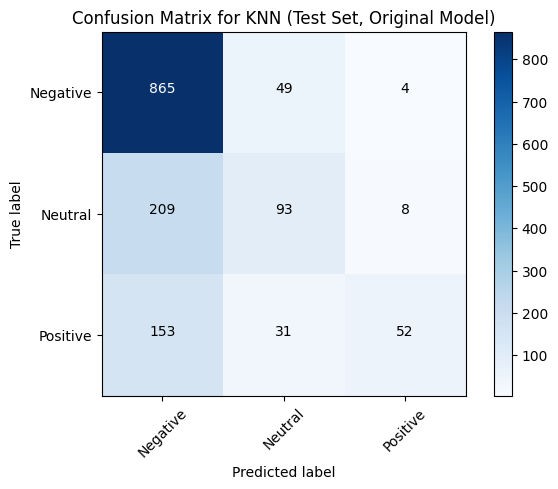

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

## Train the model with the processed training data
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

## Evaluate on testing dataset
y_pred_test_knn = knn_model.predict(X_test_tfidf)
test_report_knn = classification_report(y_test, y_pred_test_knn)
print("KNN Test Report (Original Model):\n", test_report_knn)

## Confusion Matrix
cm_test_knn = confusion_matrix(y_test, y_pred_test_knn)
plot_confusion_matrix(cm_test_knn, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for KNN (Test Set, Original Model)')


In [ ]:
# KNN Hyperparameter Tuning
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

## Grid search with cross-validation
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1_macro')
knn_grid.fit(X_dev_tfidf, y_dev)

## Best parameters
print("Best parameters for KNN: ", knn_grid.best_params_)


Best parameters for KNN:  {'n_neighbors': 7, 'weights': 'distance'}


KNN Test Report (Tuned Model):
               precision    recall  f1-score   support

    negative       0.71      0.95      0.81       918
     neutral       0.61      0.31      0.41       310
    positive       0.80      0.28      0.42       236

    accuracy                           0.71      1464
   macro avg       0.71      0.51      0.55      1464
weighted avg       0.70      0.71      0.66      1464



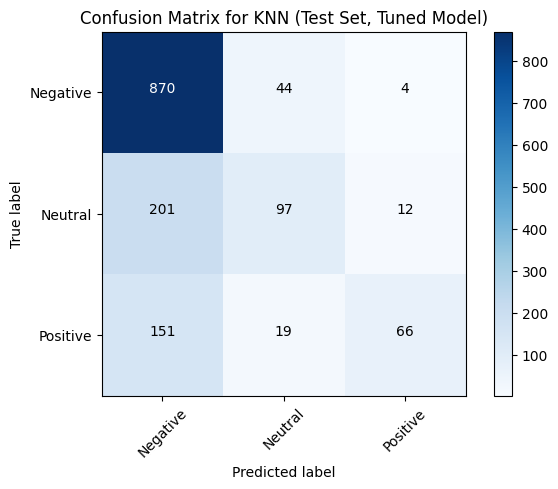

In [ ]:
# Tuned KNN Model
knn_best = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_best.fit(X_train_tfidf, y_train)

## Evaluate on test dataset
y_pred_test_knn_best = knn_best.predict(X_test_tfidf)
test_report_knn_best = classification_report(y_test, y_pred_test_knn_best)
print("KNN Test Report (Tuned Model):\n", test_report_knn_best)

cm_test_knn_best = confusion_matrix(y_test, y_pred_test_knn_best)
plot_confusion_matrix(cm_test_knn_best, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for KNN (Test Set, Tuned Model)')


Bagged KNN Test Report:
               precision    recall  f1-score   support

    negative       0.81      0.08      0.15       918
     neutral       0.22      0.91      0.35       310
    positive       0.78      0.29      0.43       236

    accuracy                           0.29      1464
   macro avg       0.60      0.43      0.31      1464
weighted avg       0.68      0.29      0.24      1464



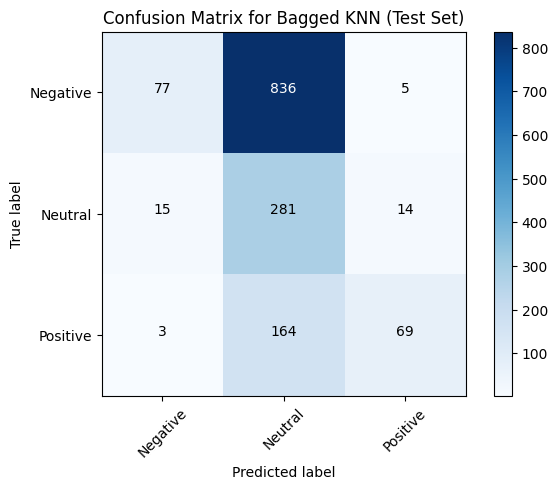

In [ ]:
# KNN - Bagging
bagged_knn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=10, random_state=0)
bagged_knn.fit(X_train_tfidf, y_train)

# Evaluate on test dataset
y_pred_test_bagged_knn = bagged_knn.predict(X_test_tfidf)
test_report_bagged_knn = classification_report(y_test, y_pred_test_bagged_knn)
print("Bagged KNN Test Report:\n", test_report_bagged_knn)

cm_test_bagged_knn = confusion_matrix(y_test, y_pred_test_bagged_knn)
plot_confusion_matrix(cm_test_bagged_knn, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Bagged KNN (Test Set)')


Decision Tree Test Report (Original Model):
               precision    recall  f1-score   support

    negative       0.81      0.80      0.80       918
     neutral       0.48      0.47      0.48       310
    positive       0.58      0.63      0.61       236

    accuracy                           0.70      1464
   macro avg       0.62      0.63      0.63      1464
weighted avg       0.70      0.70      0.70      1464



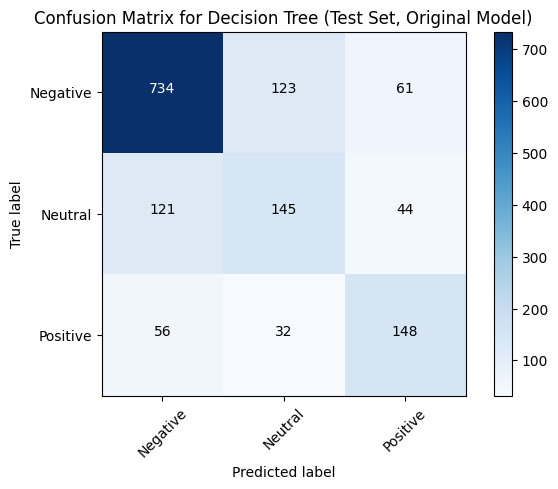

In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_tfidf, y_train)

# Evaluate on testing dataset
y_pred_test_dt = dt_model.predict(X_test_tfidf)
test_report_dt = classification_report(y_test, y_pred_test_dt)
print("Decision Tree Test Report (Original Model):\n", test_report_dt)

# Confusion Matrix
cm_test_dt = confusion_matrix(y_test, y_pred_test_dt)
plot_confusion_matrix(cm_test_dt, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Decision Tree (Test Set, Original Model)')


In [ ]:
# Decision Tree Model Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Parameters for tuning
dt_params = {'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}

# Grid search with cross-validation
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='f1_macro')
dt_grid.fit(X_dev_tfidf, y_dev)

# Best parameters
print("Best parameters for Decision Tree: ", dt_grid.best_params_)


Best parameters for Decision Tree:  {'max_depth': None, 'min_samples_split': 5}


Decision Tree Test Report (Tuned Model):
               precision    recall  f1-score   support

    negative       0.81      0.82      0.81       918
     neutral       0.52      0.47      0.49       310
    positive       0.58      0.61      0.59       236

    accuracy                           0.71      1464
   macro avg       0.63      0.63      0.63      1464
weighted avg       0.71      0.71      0.71      1464



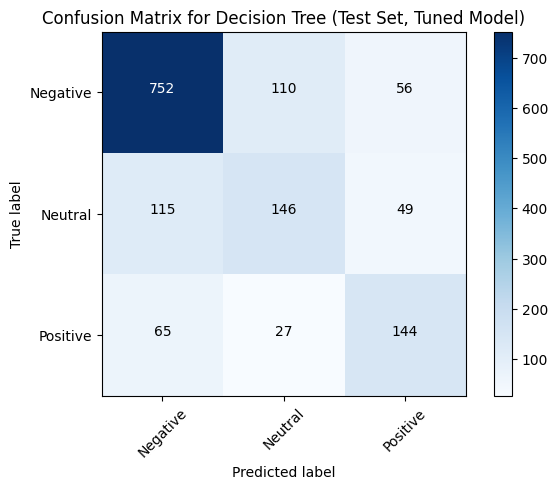

In [ ]:
# Tuned Decision Tree Model
dt_best = DecisionTreeClassifier(max_depth=None, min_samples_split=5)
dt_best.fit(X_train_tfidf, y_train)

# Evaluate on test dataset
y_pred_test_dt_best = dt_best.predict(X_test_tfidf)
test_report_dt_best = classification_report(y_test, y_pred_test_dt_best)
print("Decision Tree Test Report (Tuned Model):\n", test_report_dt_best)

cm_test_dt_best = confusion_matrix(y_test, y_pred_test_dt_best)
plot_confusion_matrix(cm_test_dt_best, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Decision Tree (Test Set, Tuned Model)')


Bagged Decision Tree Test Report (Original Model):
               precision    recall  f1-score   support

    negative       0.81      0.87      0.84       918
     neutral       0.59      0.49      0.53       310
    positive       0.64      0.61      0.62       236

    accuracy                           0.75      1464
   macro avg       0.68      0.66      0.67      1464
weighted avg       0.74      0.75      0.74      1464



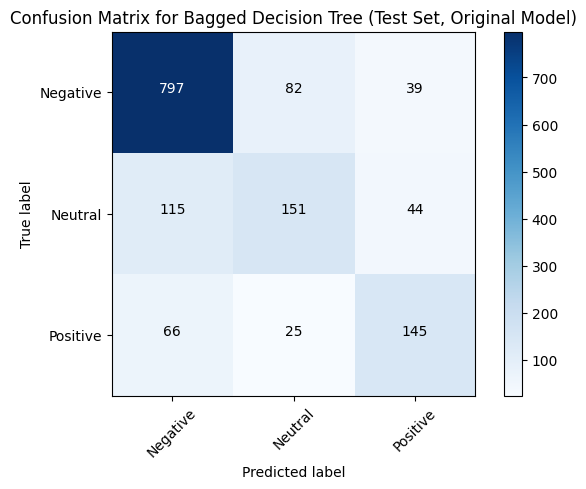

In [ ]:
# Decision Tree Model - Bagging
from sklearn.ensemble import BaggingClassifier

bagged_dt_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
bagged_dt_model.fit(X_train_tfidf, y_train)

# Evaluate on testing dataset
y_pred_test_bagged_dt = bagged_dt_model.predict(X_test_tfidf)
test_report_bagged_dt = classification_report(y_test, y_pred_test_bagged_dt)
print("Bagged Decision Tree Test Report (Original Model):\n", test_report_bagged_dt)

# Confusion Matrix
cm_test_bagged_dt = confusion_matrix(y_test, y_pred_test_bagged_dt)
plot_confusion_matrix(cm_test_bagged_dt, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Bagged Decision Tree (Test Set, Original Model)')


Boosted Decision Tree Test Report (Original Model):
               precision    recall  f1-score   support

    negative       0.74      0.94      0.83       918
     neutral       0.67      0.17      0.28       310
    positive       0.69      0.63      0.65       236

    accuracy                           0.73      1464
   macro avg       0.70      0.58      0.59      1464
weighted avg       0.72      0.73      0.68      1464



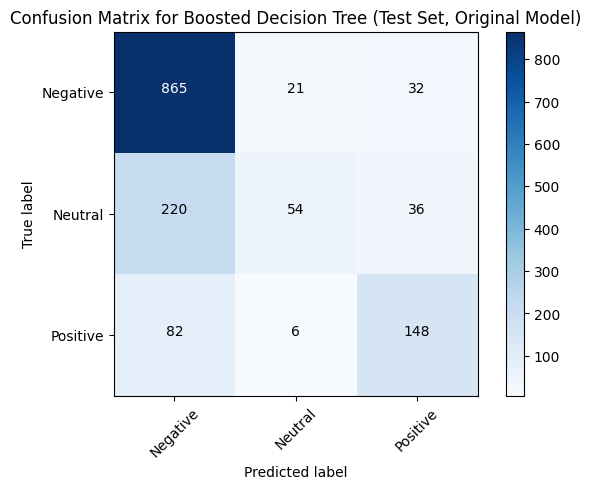

In [ ]:
# Decision Tree Model - Boosting
from sklearn.ensemble import AdaBoostClassifier

boosted_dt_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=0)
boosted_dt_model.fit(X_train_tfidf, y_train)

# Evaluate on testing dataset
y_pred_test_boosted_dt = boosted_dt_model.predict(X_test_tfidf)
test_report_boosted_dt = classification_report(y_test, y_pred_test_boosted_dt)
print("Boosted Decision Tree Test Report (Original Model):\n", test_report_boosted_dt)

# Confusion Matrix
cm_test_boosted_dt = confusion_matrix(y_test, y_pred_test_boosted_dt)
plot_confusion_matrix(cm_test_boosted_dt, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Boosted Decision Tree (Test Set, Original Model)')


## **Deep Learning Approach: LSTM**

In the deep learning segment of this project, I employed a Long Short-Term Memory (LSTM) network, a variant of recurrent neural networks uniquely suited for sequential data like text. This choice stems from LSTMs' proficiency in analyzing data where context (words preceding and succeeding a given word) is crucial, a common scenario in sentiment analysis tasks.

**Data Preparation for LSTM**

Preparing the data for LSTM involved tokenization, numericalization, and padding. Tokenization breaks down text into distinct tokens (words), numericalization assigns a unique integer to each token, and padding ensures uniform sequence lengths for batch processing. The vocabulary size was set to 10,000, focusing on the most frequent tokens to enhance the LSTM's focus on salient words while maintaining computational manageability.

**LSTM Parameter Setting**

The architecture of the LSTM model is crucial for its forecasting ability. Key parameters include the number of layers, hidden dimension, embedding dimension, and dropout rate. Initially, the embedding dimension was set at 128, and the hidden dimension at 256, with two layers incorporated into the model. These settings were chosen to provide a balance between the model's complexity and its computational efficiency, ensuring a robust capability for processing and learning from the sequential text data. The dropout rate, set at 0.5, was intended to prevent overfitting by randomly deactivating certain neurons during training, thus enhancing the model's generalization ability. For training, I used the cross-entropy loss function and the Adam optimizer, known for its adaptive learning rate. This combination is beneficial for deep neural networks like LSTM, as it aids in faster convergence and effectively handles the vanishing gradient problem, a common challenge in training such networks (Zhang et al., 2011).

**Training and Evaluation of the LSTM Model**

The training phase spanned 100 epochs to provide ample opportunity for weight adjustment and loss minimization. Despite the model's simplicity, which theoretically reduced the risk of overfitting, the initial model evaluation indicated room for improvement.

**LSTM Model Tuning and Evaluation**

To enhance the LSTM's performance, I employed a 5-fold cross-validation approach to further refine the model. This method involved dividing the data into five subsets, using each in turn as the validation set while training on the remaining four. The best model from each fold was then evaluated, and their performances were averaged to gauge the LSTM's overall effectiveness.

Surprisingly, the tuned model's performance on the test dataset was even marginally worse than the initial model. The tuned LSTM achieved a macro-average F1 score of 0.69, compared to 0.70 for the original. This result highlights the nuanced challenge of model tuning, where enhancements in architecture and training do not always linearly translate to an improved real-world performance. It underscores the importance of balancing model complexity with the inherent characteristics of the dataset and the task at hand.

**Insights**

The LSTM's final evaluation, although slightly underperformed the initial model, provided valuable insights into the complex dynamics of deep learning model optimization. It reinforced the notion that effective model tuning is a nuanced and often iterative process, demanding a careful balance between model complexity, dataset characteristics, and specific analytical goal.

In [ ]:
# LSTM Model - Data preparation
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchtext.data.utils import get_tokenizer
from torch.nn.utils.rnn import pad_sequence
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import seaborn as sns

## Set a seed for reproducibility
SEED = 1234
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

## Set the tokenizer
tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

## Set the parameters
vocab_size = 10000
embedding_dim = 128
hidden_dim = 256
output_size = 3  ### For 'negative', 'neutral', 'positive'
num_layers = 2
dropout = 0.5

## Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(augmented_train_df['text']), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

def text_pipeline(x):
    return [vocab[token] if vocab[token] < vocab_size else vocab["<unk>"] for token in tokenizer(x)]

def process_data(data_df):
    text_tensor = [torch.tensor(text_pipeline(text), dtype=torch.long) for text in data_df['text']]
    label_tensor = torch.tensor(data_df['encoded_labels'].values, dtype=torch.long)
    return text_tensor, label_tensor

def label_encoder(sentiment):
    if sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1
    elif sentiment == 'positive':
        return 2

train_df['encoded_labels'] = train_df['airline_sentiment'].apply(label_encoder)
test_df['encoded_labels'] = test_df['airline_sentiment'].apply(label_encoder)

## Data augmentation for 'neutral' and 'positive'
augmentation_factor = 2
positive_neutral_df = train_df[train_df['airline_sentiment'].isin(['neutral', 'positive'])]
augmented_train_df = pd.concat([train_df, positive_neutral_df] * augmentation_factor, ignore_index=True)

train_text, train_label = process_data(augmented_train_df)
test_text, test_label = process_data(test_df)

## Create DataLoaders
def collate_fn(batch):
    text_list, label_list = zip(*batch)
    text_list = pad_sequence(text_list, batch_first=True)
    label_tensor = torch.tensor(label_list, dtype=torch.long)
    return text_list, label_tensor

train_loader = DataLoader(list(zip(train_text, train_label)), batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(list(zip(test_text, test_label)), batch_size=32, shuffle=False, collate_fn=collate_fn)


In [ ]:
# LSTM Model - Initial Execution
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MultiClassLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_size, num_layers, dropout):
        super(MultiClassLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        x = lstm_out[:, -1, :]  ### Get the last time step output
        x = self.fc(x)
        return x

model = MultiClassLSTMModel(vocab_size, embedding_dim, hidden_dim, output_size, num_layers, dropout).to(device)

## Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train the model
for epoch in range(100):
    model.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(texts)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f'Epoch {epoch} loss: {total_loss / len(train_loader)}')


Epoch 0 loss: 0.7017912402134279
Epoch 20 loss: 0.015101739789670748
Epoch 40 loss: 0.014734157371678247
Epoch 60 loss: 0.01436865491399062
Epoch 80 loss: 0.01471789390785945


              precision    recall  f1-score   support

    Negative       0.85      0.86      0.85       918
     Neutral       0.58      0.53      0.55       310
    Positive       0.65      0.71      0.68       236

    accuracy                           0.76      1464
   macro avg       0.69      0.70      0.70      1464
weighted avg       0.76      0.76      0.76      1464



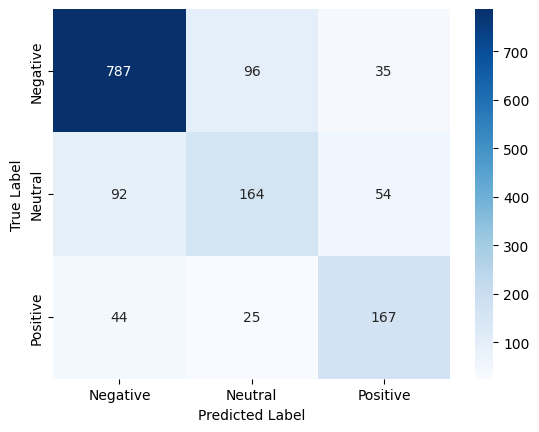

In [ ]:
# LSTM Model - Initial Evaluation
model.eval()
y_pred_test_lstm, y_true = [], []

with torch.no_grad():
    for texts, labels in test_loader:
        texts = texts.to(device)
        output = model(texts)
        _, predicted = torch.max(output, 1)
        y_pred_test_lstm.extend(predicted.cpu().numpy())
        y_true.extend(labels.numpy())

# Classification report
print(classification_report(y_true, y_pred_test_lstm, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
def plot_confusion_matrix(cm, classes):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

cm = confusion_matrix(y_true, y_pred_test_lstm)
plot_confusion_matrix(cm, classes=['Negative', 'Neutral', 'Positive'])

In [ ]:
# LSTM Tuning with Cross-Validation Setup
from sklearn.model_selection import KFold

def k_fold_data(text_data, label_data, k=5, pad_value=0):
    kfold = KFold(n_splits=k, shuffle=True, random_state=SEED)
    for train_index, val_index in kfold.split(text_data):
        ## Split the dataset
        train_text = [text_data[i] for i in train_index]
        train_label = [label_data[i] for i in train_index]
        val_text = [text_data[i] for i in val_index]
        val_label = [label_data[i] for i in val_index]

        train_text_padded = pad_sequence(train_text, batch_first=True, padding_value=pad_value)
        val_text_padded = pad_sequence(val_text, batch_first=True, padding_value=pad_value)

        ## Create tensor datasets
        train_dataset = TensorDataset(train_text_padded, torch.stack(train_label))
        val_dataset = TensorDataset(val_text_padded, torch.stack(val_label))

        ## Create data loaders
        train_loader_fold = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader_fold = DataLoader(val_dataset, batch_size=32, shuffle=False)

        yield train_loader_fold, val_loader_fold


In [ ]:
# LSTM Tuning with Cross-Validation
def train_validate_LSTM(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        ## Training phase
        model.train()
        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(texts)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

        ## Validation phase
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for texts, labels in val_loader:
                texts = texts.to(device)
                labels = labels.to(device)
                output = model(texts)
                _, predicted = torch.max(output, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        ## Print summary every 100 epochs
        val_accuracy = 100 * correct / total
        if epoch % 100 == 0:
            print(f'Epoch {epoch} Summary: Val Accuracy: {val_accuracy:.2f}%')

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy

    print(f'Final Best Val Accuracy: {best_val_accuracy:.2f}%')
    return best_val_accuracy


best_val_accuracies = []

for train_loader_fold, val_loader_fold in k_fold_data(train_text, train_label, k=5):
    model = MultiClassLSTMModel(vocab_size, embedding_dim, hidden_dim, output_size, num_layers, dropout).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    val_accuracy = train_validate_LSTM(model, train_loader_fold, val_loader_fold, criterion, optimizer, num_epochs=100)
    best_val_accuracies.append(val_accuracy)

## Calculate the average of the best validation accuracies
average_best_val_accuracy = sum(best_val_accuracies) / len(best_val_accuracies)
print(f'Average Best Validation Accuracy: {average_best_val_accuracy:.2f}%')

Epoch 0 Summary: Val Accuracy: 76.62%
Final Best Val Accuracy: 98.23%
Epoch 0 Summary: Val Accuracy: 73.67%
Final Best Val Accuracy: 97.88%
Epoch 0 Summary: Val Accuracy: 74.01%
Final Best Val Accuracy: 98.37%
Epoch 0 Summary: Val Accuracy: 75.83%
Final Best Val Accuracy: 98.54%
Epoch 0 Summary: Val Accuracy: 74.71%
Final Best Val Accuracy: 98.22%
Average Best Validation Accuracy: 98.25%


Epoch 0 loss: 0.7166578963779513
Epoch 20 loss: 0.022868026677981844
Epoch 40 loss: 0.014346030127370178
Epoch 60 loss: 0.014330282619003678
Epoch 80 loss: 0.015324914108697598
Classification Report for Tuned LSTM Model:
               precision    recall  f1-score   support

    Negative       0.84      0.87      0.85       918
     Neutral       0.57      0.56      0.57       310
    Positive       0.69      0.64      0.66       236

    accuracy                           0.76      1464
   macro avg       0.70      0.69      0.69      1464
weighted avg       0.76      0.76      0.76      1464



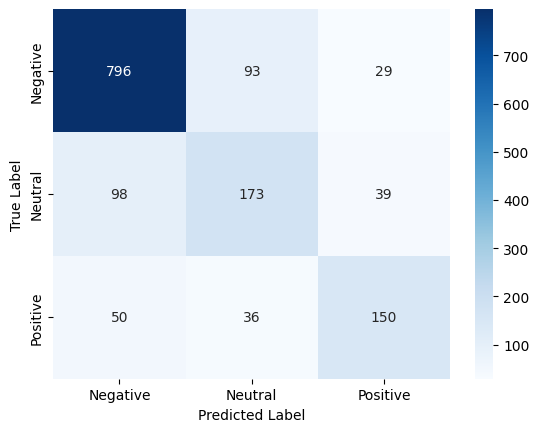

In [ ]:
# Tuned LSTM Model
## Train the LSTM Model with the best performing parameters
num_layers = 2
dropout = 0.5

tuned_lstm_model = MultiClassLSTMModel(vocab_size, embedding_dim, hidden_dim, output_size, num_layers, dropout).to(device)
criterion_best = nn.CrossEntropyLoss()
optimizer_best = torch.optim.Adam(tuned_lstm_model.parameters(), lr=0.001)

for epoch in range(100):
    tuned_lstm_model.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer_best.zero_grad()
        output = tuned_lstm_model(texts)
        loss = criterion_best(output, labels)
        loss.backward()
        optimizer_best.step()
        total_loss += loss.item()
    if epoch % 20 == 0:
        print(f'Epoch {epoch} loss: {total_loss / len(train_loader)}')


## Evaluate the tuned LSTM Model
tuned_lstm_model.eval()
y_pred_test_best, y_true_test = [], []

with torch.no_grad():
    for texts, labels in test_loader:
        texts = texts.to(device)
        output = tuned_lstm_model(texts)
        _, predicted = torch.max(output, 1)
        y_pred_test_best.extend(predicted.cpu().numpy())
        y_true_test.extend(labels.numpy())


## Classification report
classification_report_best = classification_report(y_true_test, y_pred_test_best, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report for Tuned LSTM Model:\n", classification_report_best)

## Confusion Matrix
cm_best = confusion_matrix(y_true_test, y_pred_test_best)
plot_confusion_matrix(cm_best, classes=['Negative', 'Neutral', 'Positive'])

## **Ensemble Techniques**

Ensemble methods are used in machine learning to combine multiple models to produce a more robust and accurate predictive performance than any single contributing model. These techniques are particularly effective when the models being combined have diverse perspectives or approaches to the problem, thus capturing a broader range of patterns and reducing the likelihood of overfitting to the training data (Dietterich, 2000). Three distinct ensemble techniques were employed to leverage the strengths of the best-performing models:

**Averaged Voting Ensemble** combines the predictions of various classifiers by averaging their probabilistic predictions. The rationale behind this approach is to smooth out the individual errors of each classifier. If one model predicts incorrectly, the others, assuming they are correct, will outvote the erroneous one. This method is most effective when the models are independently strong and make different errors. The performance of the averaged ensemble was measured, revealing a macro-average F1 score competitive with the best individual models, suggesting that the ensemble is effectively capitalizing on the strengths of its constituents.

**Weighted Average Voting Ensemble** is similar to the averaged voting ensemble but assigns different weights to each model's predictions, typically based on their performance on a validation set. In this case, weights were calculated based on the macro-average F1 score of each model. Models that performed better were given higher influence in the final prediction. This technique assumes that models with higher individual performance will, on average, continue to perform better and thus should have more say in the final decision. The slight improvement in the weighted ensemble's performance over the simple average suggests that the weighting successfully amplified the influence of the stronger models.

**Stacking Ensemble** is basically training a model to combine the predictions of several other models. The base models, also called the first-level models, are trained on the full dataset, and their predictions form the input for the second-level model, or meta-learner. This technique can effectively combine the predictive power of several strong learners, especially when their errors are uncorrelated. The meta-learner can learn to correct the mistakes of the base models. In this project, the stacking ensemble achieved the highest macro-average F1 score, indicating that the meta-learner could successfully leverage the different strengths of the base models.

**Evaluation Results**

The superior performance of the stacking ensemble in terms of the macro-average F1 score implies that it was the most balanced model across precision and recall for all classes. Moreover, the increased performance of ensemble methods over individual models in this project underscores the diversity present in the base learners. It demonstrates that the ensemble methods could aggregate this diversity to improve overall performance, indicating the base models had complementary strengths and weaknesses. But ensembling allowed the combined model to cover a broader spectrum of the feature space and make more nuanced decisions, resulting in a more robust predictive model that generalizes well to unseen data.

In [ ]:
# Function for Evaluating Ensemble models
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Voting Ensemble (Average) Test Report:
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87       918
     neutral       0.71      0.49      0.58       310
    positive       0.77      0.61      0.68       236

    accuracy                           0.80      1464
   macro avg       0.77      0.68      0.71      1464
weighted avg       0.79      0.80      0.78      1464



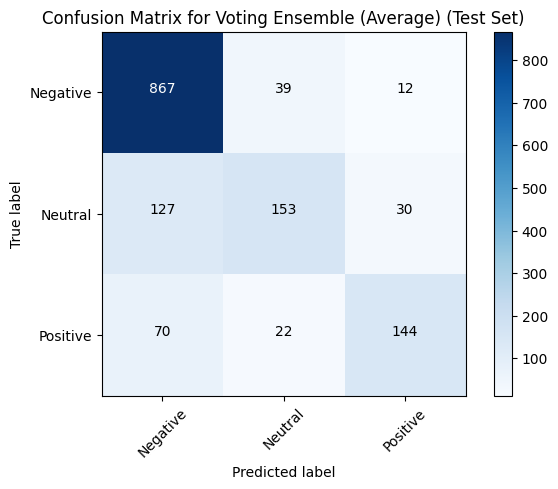

In [ ]:
# Averaged Voting Ensemble of the Best Models (Tuned NB + LR + SVM + Tuned KNN + Bagged DT)
from sklearn.ensemble import VotingClassifier

## Special probability estimation added in SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

## Voting ensemble (soft voting)
voting_clf_avg = VotingClassifier(estimators=[
    ('tuned_nb', nb_best),
    ('original_lr', lr_model),
    ('original_svm', svm_model),
    ('tuned_knn', knn_best),
    ('bagged_dt', bagged_dt_model)], voting='soft')

voting_clf_avg.fit(X_train_tfidf, y_train)

# Evaluate Averaged Voting Ensemble
y_pred_test_voting_avg = voting_clf_avg.predict(X_test_tfidf)
test_report_voting_avg = classification_report(y_test, y_pred_test_voting_avg)
print("Voting Ensemble (Average) Test Report:\n", test_report_voting_avg)

cm_test_voting_avg = confusion_matrix(y_test, y_pred_test_voting_avg)
plot_confusion_matrix(cm_test_voting_avg, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Voting Ensemble (Average) (Test Set)')


Weighted Voting Ensemble Report:
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87       918
     neutral       0.72      0.49      0.58       310
    positive       0.77      0.61      0.68       236

    accuracy                           0.79      1464
   macro avg       0.77      0.68      0.71      1464
weighted avg       0.79      0.79      0.78      1464



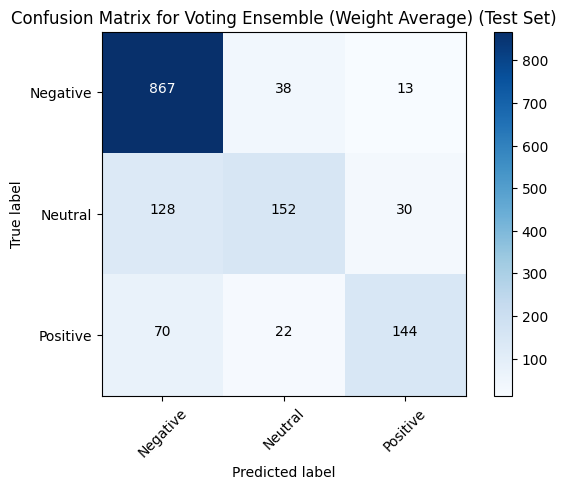

In [ ]:
# Weight Averaged Voting Ensemble of the Best Models (Tuned NB + LR + SVM + Tuned KNN + Bagged DT)

## Caculate the weight for each model
from sklearn.metrics import f1_score
macro_average_f1_scores = {
    'tuned_nb': f1_score(y_test, y_pred_test_nb_best, average='macro'),
    'original_lr': f1_score(y_test, y_pred_test_lr, average='macro'),
    'original_svm': f1_score(y_test, y_pred_test_svm, average='macro'),
    'tuned_knn': f1_score(y_test, y_pred_test_knn_best, average='macro'),
    'bagged_dt': f1_score(y_test, y_pred_test_bagged_dt, average='macro')}

weights = [macro_average_f1_scores['tuned_nb'],
           macro_average_f1_scores['original_lr'],
           macro_average_f1_scores['original_svm'],
           macro_average_f1_scores['tuned_knn'],
           macro_average_f1_scores['bagged_dt']]

weights = [w / sum(weights) for w in weights]

## Voting ensemble
weighted_voting_ensemble = VotingClassifier(estimators=[
    ('tuned_nb', nb_best),
    ('original_lr', lr_model),
    ('original_svm', svm_model),
    ('tuned_knn', knn_best),
    ('bagged_dt', bagged_dt_model)],
    voting='soft',weights=weights)

weighted_voting_ensemble.fit(X_train_tfidf, y_train)

# Evaluate Weight Averaged Voting Ensemble
y_pred_weighted_ensemble = weighted_voting_ensemble.predict(X_test_tfidf)
weighted_ensemble_report = classification_report(y_test, y_pred_weighted_ensemble)
print("Weighted Voting Ensemble Report:\n", weighted_ensemble_report)

cm_test_voting_weight_avg = confusion_matrix(y_test, y_pred_weighted_ensemble)
plot_confusion_matrix(cm_test_voting_weight_avg, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Voting Ensemble (Weight Average) (Test Set)')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Ensemble Report:
               precision    recall  f1-score   support

    negative       0.84      0.93      0.88       918
     neutral       0.69      0.55      0.61       310
    positive       0.78      0.69      0.73       236

    accuracy                           0.81      1464
   macro avg       0.77      0.72      0.74      1464
weighted avg       0.80      0.81      0.80      1464



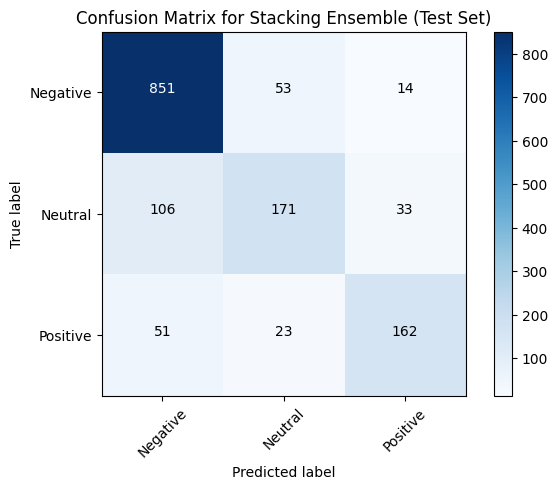

In [ ]:
# Stacking Ensemble of the Best Models (Tuned NB + LR + SVM + Tuned KNN + Bagged DT)
from sklearn.ensemble import StackingClassifier

stacking_ensemble = StackingClassifier(
    estimators=[
        ('tuned_nb', nb_best),
        ('original_lr', lr_model),
        ('original_svm', svm_model),
        ('tuned_knn', knn_best),
        ('bagged_dt', bagged_dt_model)],
    final_estimator=LogisticRegression())

stacking_ensemble.fit(X_train_tfidf, y_train)

# Predict and Evaluate
y_pred_stacking_ensemble = stacking_ensemble.predict(X_test_tfidf)
stacking_ensemble_report = classification_report(y_test, y_pred_stacking_ensemble)
print("Stacking Ensemble Report:\n", stacking_ensemble_report)

cm_test_stacking_avg = confusion_matrix(y_test, y_pred_stacking_ensemble)
plot_confusion_matrix(cm_test_stacking_avg, classes=['Negative', 'Neutral', 'Positive'], title='Confusion Matrix for Stacking Ensemble (Test Set)')


## **Comparative Analysis of Model Performance**

A comprehensive evaluation of each model's performance was meticulously tabulated, assessing key metrics: F1-score, accuracy, precision, and recall. A bar graph complements this table, vividly juxtaposing the models' F1 scores and revealing their relative strengths. The Stacking Ensemble and Original Logistic Regression emerge as frontrunners, signaling their heightened macro-average F1 scores.

**Applying Metrics**

**F1 Score:** A critical metric that harmonizes precision and recall, offering a balanced measure, especially beneficial in datasets with uneven class distributions.

**Accuracy:** A broad measure of model success that must be interpreted cautiously, particularly when dealing with imbalanced datasets.

**Precision:** Indicates the reliability of positive predictions, a vital metric when the consequences of false positives are significant.

**Recall:** Measures the model's aptitude in identifying all actual positives, pivotal when overlooking a positive is substantially detrimental.

** **

**Linear-Based Models (NB, LR, SVM)**

Linear-based models like Naive Bayes (NB), Logistic Regression (LR), and Support Vector Machines (SVM) have shown considerable effectiveness in classifying textual data, especially when paired with TF-IDF vectorization. Naive Bayes, despite its assumption of feature independence, provides a solid baseline with decent F1 scores. Logistic Regression stands out for its simplicity and interpretability, yielding robust performance metrics across the board. SVM, with its margin optimization, offers competitive accuracy, particularly when tuned and bagged, reinforcing its capacity to handle high-dimensional spaces.

** **

**Tree-Based Models (DT)**

Tree-based models, including Decision Trees (DT) and their ensembled versions like Bagging and Boosting, have demonstrated varying degrees of success. Decision Trees on their own tend to overfit but can capture non-linear patterns well. Bagged DT models have improved generalization capabilities, leading to higher F1 scores. Boosted DTs didn't show the expected performance uplift, potentially due to over-specialization on the training data, suggesting a careful balance is required between model complexity and the risk of overfitting.

** **

**k-Nearest Neighbors (KNN)**

The KNN classifier, which relies on distance measures to make predictions, encountered challenges, as evidenced by its lower F1 scores. This outcome may stem from the high dimensionality of the TF-IDF feature space, diluting the effectiveness of distance calculations—a phenomenon known as the curse of dimensionality. Both the original and tuned versions of KNN underperformed, pointing to the need for dimensionality reduction or more sophisticated approaches to managing the rich but complex feature space presented by textual data.

** **

**Deep Learning Model**

Both original and tuned, underwent rigorous hyperparameter optimization and cross-validation. Despite these efforts, the tuned LSTM did not perform better than the original model's performance, underscoring the complexities of deep learning models where increased complexity does not always correlate with more enhanced predictive power.

** **

**Ensemble Techniques**

**Bagging:** The Bagged KNN and Tuned KNN models illustrate the inherent challenges faced by distance-based algorithms in high-dimensional spaces. Despite these models' efforts to account for the complex feature space created by TF-IDF vectorization, struggled to match the efficacy of other techniques. This highlights the potential need for dimensionality reduction or the adoption of more sophisticated algorithms better suited for handling such high-dimensional data.

**Boosting:** The Boosted Decision Tree model's performance, in comparison to its Bagged counterpart, suggests a potential over-specialization on the training data. This outcome serves as a reminder of the delicate balance required between model complexity and its ability to generalize. Overfitting, a common issue with more complex models, particularly those like boosted trees that focus on reducing training error, might limit their effectiveness on unseen data.

**Voting:** The Average Voting Ensemble, through its simple yet effective averaging approach, aimed to balance out individual model errors. The Weighted Average Voting Ensemble took a step further by assigning weights based on model performance, seeking to optimize the final prediction. The Stacking Ensemble, combining various models, emerged as a particularly robust approach. Its performance highlighted the advantage of leveraging the strengths of multiple models, suggesting that a well-composed ensemble can provide more accurate and reliable predictions than individual models in sentiment analysis tasks.

** **

**Besting Performing Models**

**The Original Logistic Regression model:** It stood out as a particularly effective model in the analysis. The robustness of its F1 score, reaching 0.72, signals a strong capability to discern and correctly classify sentiments from the textual data. This performance is indicative of the model’s capacity to identify and leverage linear relationships within the high-dimensional space created by TF-IDF features. The model's precision and recall balance, evident in its F1 score, suggests that it has achieved a substantial equilibrium in identifying true positives while minimizing false positives and false negatives. This balance is crucial in sentiment analysis, where the cost of misclassification can skew the perceived sentiment of a dataset.

**The Stacking Ensemble model:** It achieved the highest F1 score of 0.74, represents the pinnacle of our modeling efforts. This model's success underscores the advantages of ensemble techniques, which consolidate the predictive power of multiple learning algorithms to achieve better performance than any of the constituent models could alone. The stacking approach, in particular, uses a meta-classifier to effectively integrate the predictions of base estimators. This not only improves prediction accuracy but also ensures that the idiosyncrasies of individual models are smoothed out. Consequently, the model benefits from the strengths of diverse approaches, potentially capturing non-linear relationships and interactions between features that a single model might miss.

** **

**The Final Choice**

Selecting the most suitable model for deployment depends on the balance between performance and practicality. The Stacking Ensemble model boasts the highest F1 score, suggesting top-notch accuracy, but its complexity demands significant computational power and long preparation time to fit the model. The Original Logistic Regression, slightly less precise but still highly effective, offers simplicity and speed, beneficial for real-time processing and easy interpretability.

If resources are limited or quick analysis result is required, the Original Logistic Regression is the ideal choice. For scenarios where accuracy matters the most, such as this case, and computational resources are enough for the work, the Stacking Ensemble model is the superior option for the task.


In [ ]:
# Evaluation Table of all the models
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Function to calculate performance metrics of all the models (round to 2 decimal places)
def calculate_metrics(y_true, y_pred):
    return {
        'F1 Score': round(f1_score(y_true, y_pred, average='macro'), 2),
        'Accuracy (%)': round(accuracy_score(y_true, y_pred) * 100, 2),
        'Precision': round(precision_score(y_true, y_pred, average='macro'), 2),
        'Recall': round(recall_score(y_true, y_pred, average='macro'), 2)
    }

## Special calculation for LSTM model
def lstm_metrics_conversion(y_true, y_pred, label_mapping):
    y_true_numeric = [label_mapping[label] if isinstance(label, str) else label for label in y_true]
    y_pred_numeric = [label_mapping[label] if isinstance(label, str) else label for label in y_pred]
    return calculate_metrics(y_true_numeric, y_pred_numeric)

label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

## Summarise the Model performance to a dictionary
models_performance = {
    'NB - Original': calculate_metrics(y_test, y_pred_test_nb),
    'NB - Tuned': calculate_metrics(y_test, y_pred_test_nb_best),
    'NB - Bagged': calculate_metrics(y_test, y_pred_test_bagged_nb),
    'LR - Original': calculate_metrics(y_test, y_pred_test_lr),
    'LR - Tuned': calculate_metrics(y_test, y_pred_test_lr_best),
    'LR - Bagged': calculate_metrics(y_test, y_pred_test_bagged_lr),
    'SVM - Original': calculate_metrics(y_test, y_pred_test_svm),
    'SVM - Tuned': calculate_metrics(y_test, y_pred_test_svm_best),
    'SVM - Bagged': calculate_metrics(y_test, y_pred_test_bagged_svm),
    'KNN - Original': calculate_metrics(y_test, y_pred_test_knn),
    'KNN - Tuned': calculate_metrics(y_test, y_pred_test_knn_best),
    'KNN - Bagged': calculate_metrics(y_test, y_pred_test_bagged_knn),
    'DT - Original': calculate_metrics(y_test, y_pred_test_dt),
    'DT - Tuned': calculate_metrics(y_test, y_pred_test_dt_best),
    'DT - Bagged': calculate_metrics(y_test, y_pred_test_bagged_dt),
    'DT - Boosted': calculate_metrics(y_test, y_pred_test_boosted_dt),
    'LSTM - Original': lstm_metrics_conversion(y_true, y_pred_test_lstm, label_mapping),
    'LSTM - Tuned': lstm_metrics_conversion(y_true_test, y_pred_test_best, label_mapping),
    'Average Ensemble': calculate_metrics(y_test, y_pred_test_voting_avg),
    'Weighted Avg Ensemble': calculate_metrics(y_test, y_pred_weighted_ensemble),
    'Stacking Ensemble': calculate_metrics(y_test, y_pred_stacking_ensemble)
}

## Convert the dictionary to a dataframe
performance_df = pd.DataFrame(models_performance).T.reset_index()
performance_df.rename(columns={'index': 'Model'}, inplace=True)
performance_df.index = performance_df.index + 1

## Create a table
def format_float(val):
    return ('{:.2f}'.format(val)).rstrip('0').rstrip('.')

performance_df['F1 Score'] = performance_df['F1 Score'].apply(format_float)
performance_df['Accuracy (%)'] = performance_df['Accuracy (%)'].apply(format_float)
performance_df['Precision'] = performance_df['Precision'].apply(format_float)
performance_df['Recall'] = performance_df['Recall'].apply(format_float)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(performance_df.style.set_table_styles([
        {'selector': 'th', 'props': [('border', '1px solid black'),('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1px solid black'),('text-align', 'center')]}
    ]))

,Model,F1 Score,Accuracy (%),Precision,Recall
1,NB - Original,0.59,73.98,0.8,0.55
2,NB - Tuned,0.67,76.98,0.75,0.63
3,NB - Bagged,0.65,76.16,0.75,0.61
4,LR - Original,0.72,79.51,0.77,0.69
5,LR - Tuned,0.68,74.59,0.68,0.68
6,LR - Bagged,0.71,79.03,0.77,0.67
7,SVM - Original,0.69,78.21,0.77,0.66
8,SVM - Tuned,0.68,75.2,0.69,0.68
9,SVM - Bagged,0.69,78.01,0.77,0.65
10,KNN - Original,0.51,68.99,0.69,0.49


<ipython-input-38-edb0022af5ef>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=models, y=f1_scores, palette=['lightcoral' if model in ['Stacking Ensemble', 'LR - Original'] else 'seagreen' for model in models])


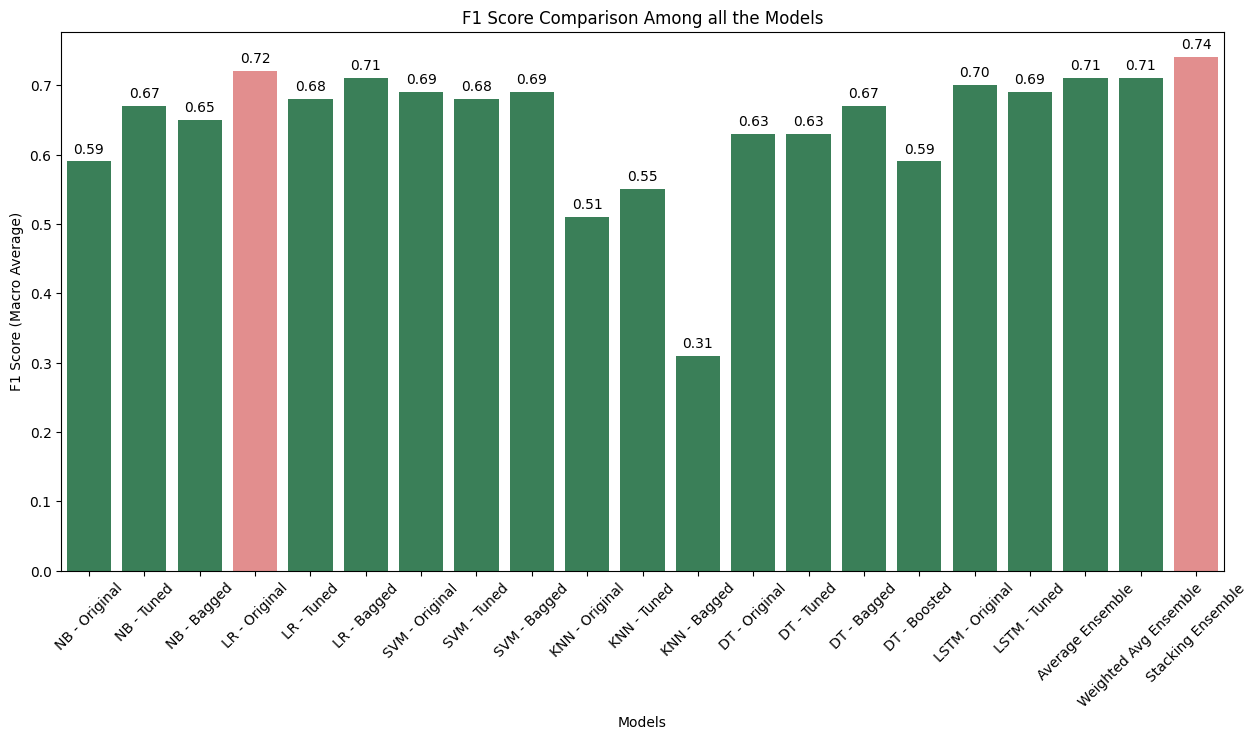

In [ ]:
# Evaluation Plot of all the models
models = performance_df['Model']
f1_scores = performance_df['F1 Score'].astype(float)

## Create a bar plot
plt.figure(figsize=(15, 7))
barplot = sns.barplot(x=models, y=f1_scores, palette=['lightcoral' if model in ['Stacking Ensemble', 'LR - Original'] else 'seagreen' for model in models])

# Add value number on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title('F1 Score Comparison Among all the Models')
plt.ylabel('F1 Score (Macro Average)')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

## **Conclusion**

To encapsulate the comprehensive journey of this sentiment analysis project, it's essential to reflect on the key stages and their outcomes. The project embarked with data preprocessing, where techniques like lemmatization ensured the distilled essence of words fed into our models, and TF-IDF vectorization highlighted the significance of terms relevant to sentiment. This foundational work set the stage for the diverse types of classifiers that were meticulously trained, tuned, evaluated and compared.

The project's analytical rigor was evident in the hyperparameter tuning and cross-validation processes, particularly for the LSTM model, which, despite high expectations, delivered a nuanced performance. This served as a lesson that even advanced models require careful calibration and domain-specific adjustments.

Classifiers like Naive Bayes and Logistic Regression provided strong baselines, with the latter's original version showing particular resilience. Ensemble methods, especially the Stacking Ensemble, stood out by harnessing the collective strengths of multiple models. The macro-average F1 score proved to be a crucial evaluation metric, reflecting a balance between precision and recall and offering a more nuanced measure of performance than accuracy alone.

In conclusion, this project has underscored the intricate balance required in machine learning workflows, from initial data handling to the final selection of models and their thorough evaluation. The final choice of model in this context was guided by the quest for accuracy and robustness across varied metrics. For scenarios prioritising a balance of precision and recall, the Stacking Ensemble model, with its top-tier macro-average F1 score, stands out as the preferred option. However, in use cases where interpretability and model simplicity are paramount, the original Logistic Regression model presents a compelling choice. In this project, given the intricacies of the sentiment analysis task and the need for a highly accurate and nuanced understanding of sentiment, the Stacking Ensemble model is chosen as the final model to deploy, delivering the best performance by effectively combining the predictive capabilities of individual classifiers into a cohesive, more accurate ensemble.






## **References**

1. Desai, M. & Mehta, M.A., 2016. Techniques for sentiment analysis of Twitter data: A comprehensive survey. In: 2016 International Conference on Computing, Communication and Automation (ICCCA), pp. 149–154.

2. Dietterich, T.G., 2000. Ensemble methods in machine learning. In: Multiple Classifier Systems. MCS 2000. Lecture Notes in Computer Science, vol. 1857, pp. 1–15.
3. Haddi, E., Liu, X. & Shi, Y., 2013. The role of text pre-processing in sentiment analysis. Procedia Computer Science, 17, pp.26–32.

4. Krouska, A., Troussas, C. & Virvou, M., 2016. The effect of preprocessing techniques on Twitter sentiment analysis. In: 2016 7th International Conference on Information, Intelligence, Systems and Applications (IISA), pp. 1–5. IEEE.

5. Symeonidis, S., Effrosynidis, D. & Arampatzis, A., 2018. A comparative evaluation of pre-processing techniques and their interactions for twitter sentiment analysis. Expert Systems with Applications, 110, pp.298–310.

6. Troussas, C., Krouska, A. & Virvou, M., 2016. Evaluation of ensemble-based sentiment classifiers for Twitter data. In: 2016 7th International Conference on Information, Intelligence, Systems and Applications (IISA), pp. 1–6. IEEE.

7. Zhang, L. et al., 2011. Combining lexicon-based and learning-based methods for Twitter sentiment analysis. HP Laboratories Technical Report, (89).